# Used Car Dataset EDA and Price Prediction using Different Machine Learning Models
by Moses Kiboma

#  Loading Dataset
For this project, I used the dataset on used car sales from
all over the United States from TrueCar. 
### The features available
in this dataset are 

Mileage,
Make,
Model,
Year,
State,
City,

### Import necessary libraries

In [61]:
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns #visualization
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from warnings import simplefilter #Filtering warnings
#Liblaries for models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor

simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Loading dataaets into DataFrames

In [ ]:
#Loading Dataset 1
df1 = pd.read_csv('true_car_listings.csv')
df1.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [ ]:
#Loading Dataset and skipping bad lines
df2 = pd.read_csv('tc20171021.csv' , on_bad_lines='skip')
df2.head()


,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [ ]:
# shape of dataset 1
df1.shape


(852122, 8)

In [ ]:
# shape of dataset 1
df2.shape

(1216250, 9)

# Droping column ID from dataset 2
To merge the data sets the colums must be equla that is why we are droping column ID to make sure there is no maerging error

In [ ]:
df3=df2.drop(['Id'], axis = 1)
df3

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...
1216245,79900,2017,25,East Hanover,NJ,YV4BC0ZX0H1128239,Volvo,XC90T8
1216246,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8
1216247,68755,2018,2500,Englewood,NJ,YV4A22PL4J1212676,Volvo,XC90T6
1216248,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6


In [ ]:
# dataset 1 columns
df1.columns


Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [ ]:
#dataset 2 columns
df3.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

Now that colums are equal as show by the results we can be able to merge

# Merging the datasets

In [ ]:
maindf = pd.merge(df1, df3)
maindf

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
539140,54995,2017,10913,Berwyn,PA,YV1A22ML5H1004169,Volvo,S90T6
539141,61990,2017,2201,Winston Salem,NC,YV1A22ML0H1006850,Volvo,S90T6
539142,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8
539143,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6


After corretly merging the data increases 

# Columns Types
Here am finding column types which can help me identfy categorical and numerical data

In [ ]:
maindf.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539145 entries, 0 to 539144
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    539145 non-null  int64 
 1   Year     539145 non-null  int64 
 2   Mileage  539145 non-null  int64 
 3   City     539145 non-null  object
 4   State    539145 non-null  object
 5   Vin      539145 non-null  object
 6   Make     539145 non-null  object
 7   Model    539145 non-null  object
dtypes: int64(3), object(5)
memory usage: 37.0+ MB


This info shows us the summary of the combined dataset

# Checking missing values

In [ ]:
maindf.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

As you can see there are no missing values from the dataset

# Statistical Analysis:


# Descriptive Analysis for Numerical data

I have identfied numerical data from our combined dataset

In [ ]:
numdata= maindf.select_dtypes(include=['int64']).copy()
numdata

,Price,Year,Mileage
0,8995,2014,35725
1,10888,2013,19606
2,8995,2013,48851
3,10999,2014,39922
4,14799,2016,22142
...,...,...,...
539140,54995,2017,10913
539141,61990,2017,2201
539142,80895,2017,10
539143,72260,2017,3201


In [ ]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(6,3)})

def plot_histogram(col, color_val='#005c9d',\
                   x_label='Price', y_label='Frequency',\
                   title_text='Distribution of car prices'):
    sns.distplot(col, kde=False, color=color_val)
    
    ax = plt.gca()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title_text)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

    plt.show()

### Comparing mean and median of pricesof our dataset

In [ ]:
print('Mean:', numdata.Price.mean())
print()
print('Median: ',numdata.Price.median())

Mean: 20752.166610095614

Median:  17898.0


### Finding minmum and maximum  prices of our dataset

In [ ]:
print('MaxMum price: ', numdata.Price.max())
print('MinMum price: ', numdata.Price.min())

MaxMum price:  499500
MinMum price:  1500


In [ ]:
numdata.describe()

,Price,Year,Mileage
count,539145.000000,539145.000000,5.391450e+05
mean,20752.166610,2013.025310,5.476343e+04
std,13583.398559,3.571959,4.343680e+04
min,1500.000000,1997.000000,5.000000e+00
25%,12746.000000,2012.000000,2.462500e+04
50%,17898.000000,2014.000000,4.185800e+04
75%,25995.000000,2015.000000,7.657800e+04
max,499500.000000,2018.000000,2.856196e+06


#Visualizing Descriptive data

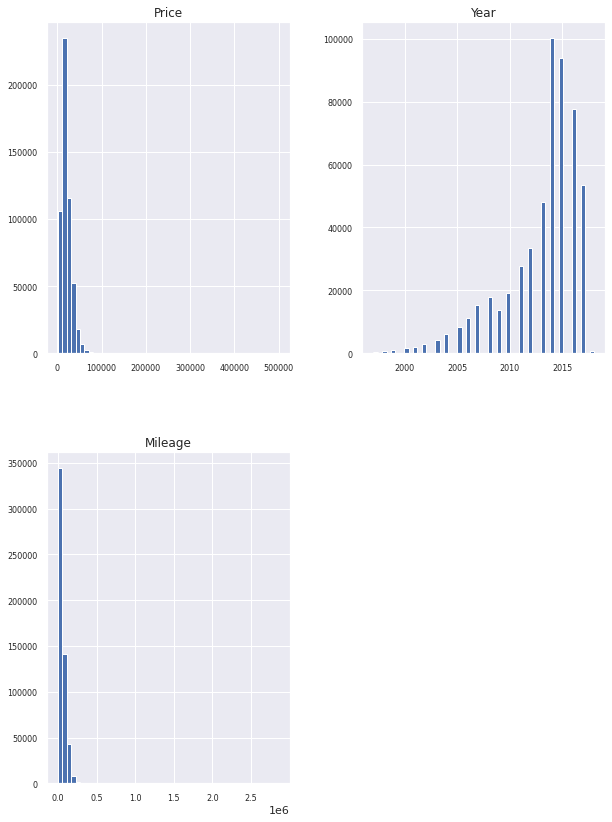

In [ ]:
numdata.hist(figsize=(10, 14), bins=50, xlabelsize=8, ylabelsize=8); 

From the histograms we can know how numerical data relate to eah other

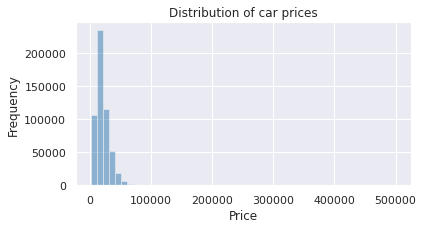

In [ ]:
price_mill = numdata.Price
plot_histogram(price_mill)

The plot indicates that the prices are skewed toward the left, with the maximum number of cars hovering between 0 and 100000.

For a better perspective, let us view the distribution in the USD 0–100000 range

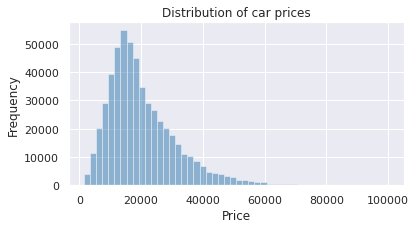

In [ ]:
plot_histogram(numdata.Price[numdata.Price<100000])

Apparently, a large number of cars in the database are priced between at 12995 . Here is code that proves this:

In [ ]:
price_counts = numdata.Price.value_counts()
print('Price: ', price_counts.index[0], '\nCounts: ', price_counts.values[0])
print('\nTen most frequently occurring prices:\n')
print(price_counts[:10])

Price:  14995 
Counts:  3465

Ten most frequently occurring prices:

14995    3465
13995    3306
12995    3291
9995     3173
15995    2998
16995    2972
10995    2966
11995    2916
8995     2907
7995     2534
Name: Price, dtype: int64


## How make is Interelated with Prices

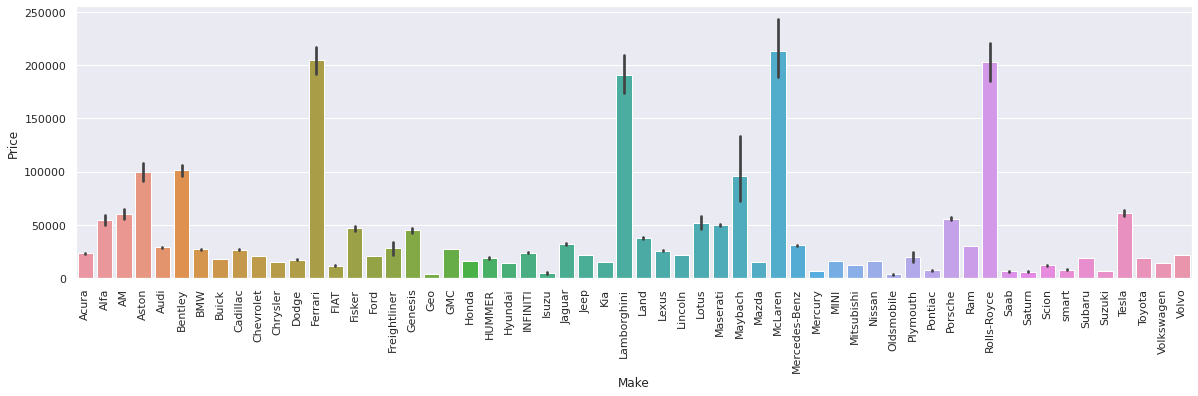

In [ ]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x='Make', y='Price', data=maindf);

from the grap MCLarren cost high that other cars

#How state is related to price

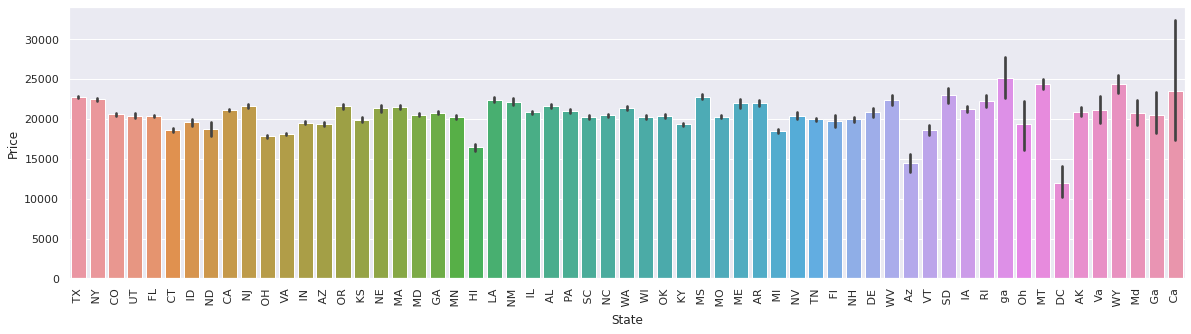

In [ ]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x='State', y='Price', data=maindf);

#How Year relate to Prices

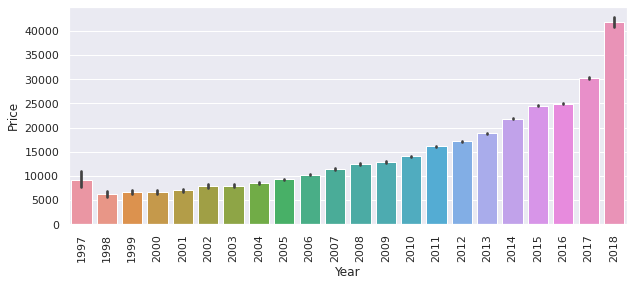

In [ ]:
year = maindf.Year.astype(np.int64)
price = maindf.Price
plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
sns.barplot(year, price);

The price went high with the years

## How Mileage compares to prices of cars

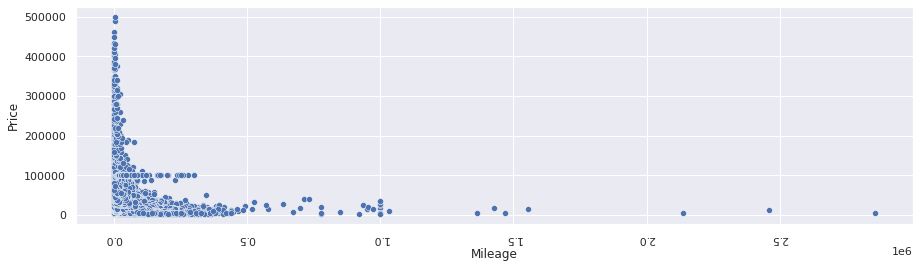

In [ ]:
Mileage = maindf.Mileage.astype(np.int64)
price = maindf.Price
plt.figure(figsize=(15, 4))
plt.xticks(rotation=180)
sns.scatterplot(Mileage, price);

From the scatter plot graph we can conclude that the less the milliage the higher the price or the higher the milleage the less the price

In [ ]:
corr=maindf.corr()
corr

,Price,Year,Mileage
Price,1.000000,0.415143,-0.435322
Year,0.415143,1.000000,-0.766524
Mileage,-0.435322,-0.766524,1.000000


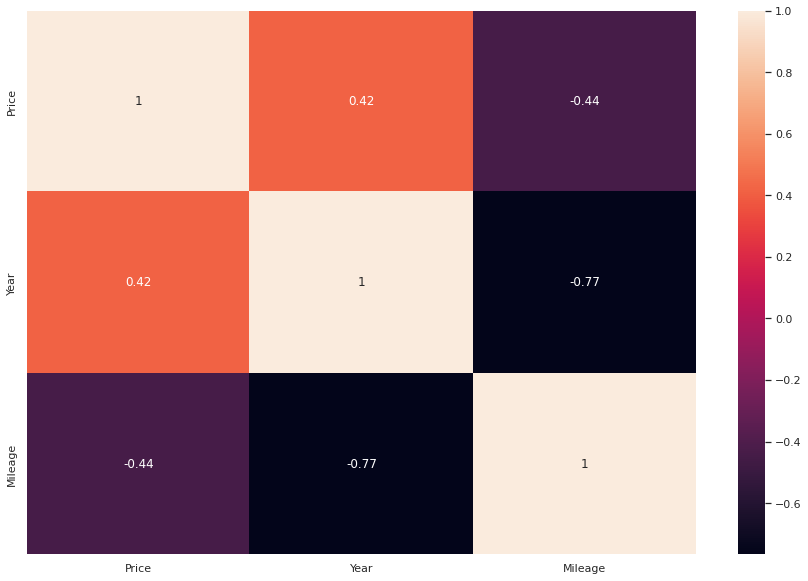

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot=True)

Correlation helps us know how much strong the numerical data is related to each other

In [ ]:
numdata.info

<bound method DataFrame.info of         Price  Year  Mileage
0        8995  2014    35725
1       10888  2013    19606
2        8995  2013    48851
3       10999  2014    39922
4       14799  2016    22142
...       ...   ...      ...
539140  54995  2017    10913
539141  61990  2017     2201
539142  80895  2017       10
539143  72260  2017     3201
539144  55999  2016    28941

[539145 rows x 3 columns]>

# Categorical Features Analysis


I identfied the categorical data by using object

In [ ]:
 catdata= maindf.select_dtypes(include=['object']).copy()
 catdata

,City,State,Vin,Make,Model
0,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...
539140,Berwyn,PA,YV1A22ML5H1004169,Volvo,S90T6
539141,Winston Salem,NC,YV1A22ML0H1006850,Volvo,S90T6
539142,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8
539143,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6


In [ ]:
catdata.info

<bound method DataFrame.info of                     City State                Vin   Make         Model
0                El Paso    TX  19VDE2E53EE000083  Acura    ILX6-Speed
1       Long Island City    NY  19VDE1F52DE012636  Acura    ILX5-Speed
2                El Paso    TX  19VDE2E52DE000025  Acura    ILX6-Speed
3                Windsor    CO  19VDE1F71EE003817  Acura    ILX5-Speed
4                 Lindon    UT  19UDE2F32GA001284  Acura  ILXAutomatic
...                  ...   ...                ...    ...           ...
539140            Berwyn    PA  YV1A22ML5H1004169  Volvo         S90T6
539141     Winston Salem    NC  YV1A22ML0H1006850  Volvo         S90T6
539142      Corte Madera    CA  YV4BC0ZX0H1124188  Volvo        XC90T8
539143         Englewood    NJ  YV4A22PL3H1186162  Volvo        XC90T6
539144      Fort Collins    CO  YV4A22PL4G1000868  Volvo       XC90AWD

[539145 rows x 5 columns]>

Categorical data have same rows that Numerucal colums

#### Checking missing values

In [ ]:
print(catdata.isnull().sum())

City     0
State    0
Vin      0
Make     0
Model    0
dtype: int64


###Lets know what each of our colums contain

In [ ]:
print(catdata['State'].value_counts())

 TX    61833
 CA    52699
 FL    49687
 GA    24219
 IL    23615
 NC    23433
 VA    21956
 NY    18149
 NJ    17353
 PA    17292
 AZ    14832
 CO    14654
 OH    14326
 WA    13975
 TN    11603
 MA    10752
 MD    10500
 IN     9565
 MO     9341
 KY     9195
 AL     8085
 CT     6713
 MI     6700
 OR     6573
 MN     6550
 SC     6437
 UT     6270
 WI     6171
 LA     5574
 OK     5526
 KS     4870
 NV     4575
 MS     4076
 AR     3961
 NH     3695
 NM     3141
 NE     2983
 IA     2799
 ID     2281
 HI     2146
 DE     1449
 MT     1350
 ME     1346
 AK     1219
 RI     1124
 WV      984
 SD      883
 VT      724
 ND      553
 Fl      525
 WY      396
 Va      121
 Md       92
 ga       77
 Ga       65
 Az       52
 Oh       35
 DC       23
 Ca       22
Name: State, dtype: int64


In [ ]:
print(catdata['Vin'].value_counts())

1G1JC6SH8E4194609    2
1FADP3F24GL320976    2
3FADP4BJ5GM148345    2
2G1FB1E32F9284364    2
1FADP3K2XHL216581    2
                    ..
3FADP4EJ8HM129009    1
3FAHP0HA2CR332768    1
3FADP4FJ5HM139205    1
3FA6P0H92ER114992    1
YV4A22PL4G1000868    1
Name: Vin, Length: 539126, dtype: int64


In [ ]:
print(catdata['Make'].value_counts())

Chevrolet        65115
Ford             62640
Toyota           45441
Nissan           42834
BMW              32415
Honda            30800
Jeep             24204
Hyundai          23050
Dodge            22579
GMC              18008
Kia              17281
Mercedes-Benz    16787
Volkswagen       14713
Audi             12618
Acura            11049
Lexus            10891
Chrysler         10201
Subaru           10099
Cadillac          9376
Mazda             8684
Buick             7654
INFINITI          7366
Ram               6376
Lincoln           4396
Volvo             2985
Mitsubishi        2787
MINI              2678
Land              2505
Porsche           2492
Scion             2024
Pontiac           1356
Jaguar            1290
FIAT              1194
Mercury            815
Saturn             778
HUMMER             654
Maserati           634
smart              504
Bentley            367
Suzuki             263
Saab               203
Ferrari            192
Tesla              151
Aston      

In [ ]:
print(catdata['Model'].value_counts())

Silverado      15811
3              11131
Grand          10898
Accord          8484
F-1504WD        7358
               ...  
3500Last           1
LHS4dr             1
4500               1
1500HFE            1
V60Polestar        1
Name: Model, Length: 2579, dtype: int64


In [ ]:
print(catdata['City'].value_counts())

Houston                 8810
San Antonio             5115
Louisville              4392
Jacksonville            4004
Orlando                 3743
                        ... 
Los Banos                  3
Royston                    2
White River Junction       2
Holbrook                   2
Port Jervis                1
Name: City, Length: 2553, dtype: int64


# Visualize Our categorical data

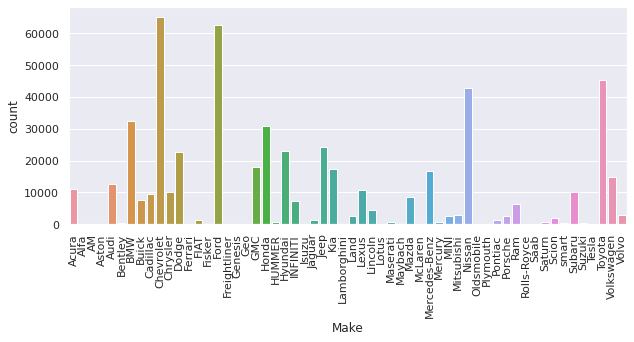

In [ ]:
plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
sns.countplot(catdata.Make);

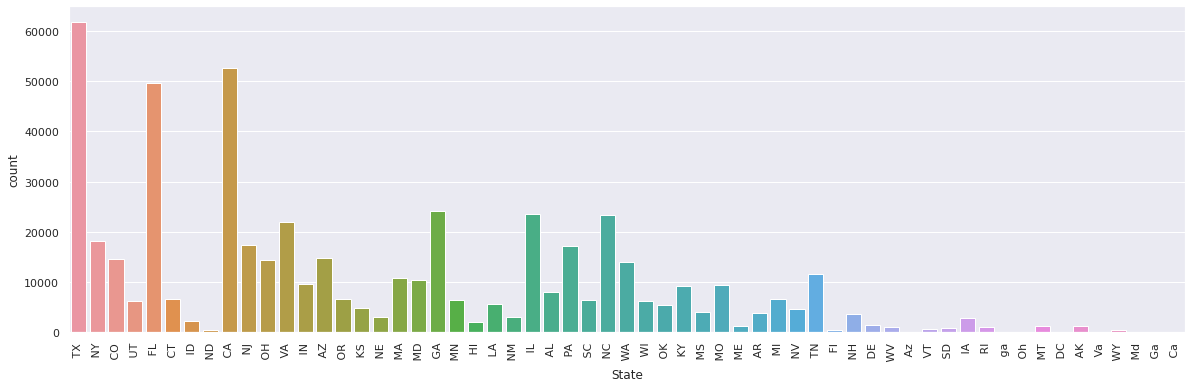

In [ ]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.countplot(catdata.State);

Texas has higher number of cars compared to other states

#Removing Duplicate vins

In [ ]:
#sorting first
maindf.sort_values("Vin", inplace = True)

In [ ]:
maindf.drop_duplicates(subset ="Vin",
                     keep = False, inplace = True)
maindf

,Price,Year,Mileage,City,State,Vin,Make,Model
61497,29833,2016,55,Tinley Park,IL,04WT3N56GG0646582,Buick,CascadaPremium
61498,29833,2016,56,Tinley Park,IL,04WT3N59GG1261202,Buick,CascadaPremium
285146,77995,2004,51651,Hampstead,MD,137FA84374E208897,HUMMER,H14-Passenger
11111,89999,2001,49100,Houston,TX,137FA843X1E195221,AM,General
285141,59995,2002,44420,Manassas,VA,137FA843X2E197617,HUMMER,H14-Passenger
...,...,...,...,...,...,...,...,...
376887,80990,2017,11819,Indianapolis,IN,ZN661YUL7HX199849,Maserati,LevanteS
376898,85900,2017,3952,Oakhurst,NJ,ZN661YUL8HX196815,Maserati,LevanteS
376882,81875,2017,2220,Oakhurst,NJ,ZN661YUL8HX230445,Maserati,LevanteS
376876,82687,2017,1632,Gaithersburg,MD,ZN661YUS7HX230573,Maserati,LevanteS


#Combining categorical data and numerical data

In [ ]:
cleandf=numdata.append(catdata)
cleandf

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995.0,2014.0,35725.0,NaN,NaN,NaN,NaN,NaN
1,10888.0,2013.0,19606.0,NaN,NaN,NaN,NaN,NaN
2,8995.0,2013.0,48851.0,NaN,NaN,NaN,NaN,NaN
3,10999.0,2014.0,39922.0,NaN,NaN,NaN,NaN,NaN
4,14799.0,2016.0,22142.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
539140,NaN,NaN,NaN,Berwyn,PA,YV1A22ML5H1004169,Volvo,S90T6
539141,NaN,NaN,NaN,Winston Salem,NC,YV1A22ML0H1006850,Volvo,S90T6
539142,NaN,NaN,NaN,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8
539143,NaN,NaN,NaN,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6


#Uppecasing Colum names

In [ ]:
maindf.columns = maindf.columns.str.upper()
maindf

,PRICE,YEAR,MILEAGE,CITY,STATE,VIN,MAKE,MODEL
61497,29833,2016,55,Tinley Park,IL,04WT3N56GG0646582,Buick,CascadaPremium
61498,29833,2016,56,Tinley Park,IL,04WT3N59GG1261202,Buick,CascadaPremium
285146,77995,2004,51651,Hampstead,MD,137FA84374E208897,HUMMER,H14-Passenger
11111,89999,2001,49100,Houston,TX,137FA843X1E195221,AM,General
285141,59995,2002,44420,Manassas,VA,137FA843X2E197617,HUMMER,H14-Passenger
...,...,...,...,...,...,...,...,...
376887,80990,2017,11819,Indianapolis,IN,ZN661YUL7HX199849,Maserati,LevanteS
376898,85900,2017,3952,Oakhurst,NJ,ZN661YUL8HX196815,Maserati,LevanteS
376882,81875,2017,2220,Oakhurst,NJ,ZN661YUL8HX230445,Maserati,LevanteS
376876,82687,2017,1632,Gaithersburg,MD,ZN661YUS7HX230573,Maserati,LevanteS


# Dividing into Old and New sets

#Removing Vin Column

In [ ]:
maindf.drop('VIN', inplace=True, axis=1)
maindf

,PRICE,YEAR,MILEAGE,CITY,STATE,MAKE,MODEL
61497,29833,2016,55,Tinley Park,IL,Buick,CascadaPremium
61498,29833,2016,56,Tinley Park,IL,Buick,CascadaPremium
285146,77995,2004,51651,Hampstead,MD,HUMMER,H14-Passenger
11111,89999,2001,49100,Houston,TX,AM,General
285141,59995,2002,44420,Manassas,VA,HUMMER,H14-Passenger
...,...,...,...,...,...,...,...
376887,80990,2017,11819,Indianapolis,IN,Maserati,LevanteS
376898,85900,2017,3952,Oakhurst,NJ,Maserati,LevanteS
376882,81875,2017,2220,Oakhurst,NJ,Maserati,LevanteS
376876,82687,2017,1632,Gaithersburg,MD,Maserati,LevanteS


#Feature Engineering:

# Removing Outliers

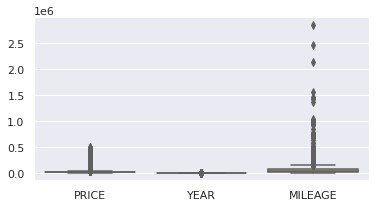

In [ ]:
sns.boxplot(data =maindf,color="y") 
plt.show()

In [ ]:
Q1 = maindf.quantile(0.25)
Q3 = maindf.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
Q1

PRICE      12746.0
YEAR        2012.0
MILEAGE    24625.0
Name: 0.25, dtype: float64

In [ ]:
Q3

PRICE      25995.0
YEAR        2015.0
MILEAGE    76579.0
Name: 0.75, dtype: float64

In [ ]:
IQR

PRICE      13249.0
YEAR           3.0
MILEAGE    51954.0
dtype: float64

In [ ]:
maindf1 = maindf[~((maindf < (Q1 - 1.5 * IQR)) | (maindf > (Q3 + 1.5 * IQR))).any(axis=1)]
maindf1

,PRICE,YEAR,MILEAGE,CITY,STATE,MAKE,MODEL
61497,29833,2016,55,Tinley Park,IL,Buick,CascadaPremium
61498,29833,2016,56,Tinley Park,IL,Buick,CascadaPremium
190036,16160,2014,31039,Santa Ana,CA,Ford,Mustang
584,19998,2016,16233,Indianapolis,IN,Acura,ILXAutomatic
1761,26598,2017,4309,San Juan,TX,Acura,ILXAutomatic
...,...,...,...,...,...,...,...
456241,18512,2015,7935,West Valley,UT,Ram,ProMaster
455743,17000,2016,5165,Monticello,MN,Ram,ProMaster
455847,15980,2016,17723,Pacoima,CA,Ram,ProMaster
455713,15988,2015,5912,Claremont,CA,Ram,ProMaster


# saving the clean data

In [53]:
# saving the dataframe
maindf.to_csv('clean_car_dataset.csv')

#Data modelling using diffrent machine leaning classfiers

In [54]:
#Loading Clean dataset
clean = pd.read_csv('clean_car_dataset.csv')
clean.head()

,Unnamed: 0,PRICE,YEAR,MILEAGE,CITY,STATE,MAKE,MODEL
0,61497,29833,2016,55,Tinley Park,IL,Buick,CascadaPremium
1,61498,29833,2016,56,Tinley Park,IL,Buick,CascadaPremium
2,285146,77995,2004,51651,Hampstead,MD,HUMMER,H14-Passenger
3,11111,89999,2001,49100,Houston,TX,AM,General
4,285141,59995,2002,44420,Manassas,VA,HUMMER,H14-Passenger


## removing the first un imporntant column

In [55]:
clean.drop('Unnamed: 0', inplace=True, axis=1)
clean

,PRICE,YEAR,MILEAGE,CITY,STATE,MAKE,MODEL
0,29833,2016,55,Tinley Park,IL,Buick,CascadaPremium
1,29833,2016,56,Tinley Park,IL,Buick,CascadaPremium
2,77995,2004,51651,Hampstead,MD,HUMMER,H14-Passenger
3,89999,2001,49100,Houston,TX,AM,General
4,59995,2002,44420,Manassas,VA,HUMMER,H14-Passenger
...,...,...,...,...,...,...,...
539102,80990,2017,11819,Indianapolis,IN,Maserati,LevanteS
539103,85900,2017,3952,Oakhurst,NJ,Maserati,LevanteS
539104,81875,2017,2220,Oakhurst,NJ,Maserati,LevanteS
539105,82687,2017,1632,Gaithersburg,MD,Maserati,LevanteS


# creating models

In [57]:
X = clean[['YEAR', 'MILEAGE']]
y = clean[['PRICE']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)

#

# Linear Regression

In [58]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [59]:
y_predict = model.predict(X_test)
y_test = np.array(y_test)

In [60]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.20585286451088947

Use K Fold cross validation to measure accuracy of our LinearRegression model.

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.68942911, 0.69103796, 0.68240094, 0.66946684, 0.68768692])

As you can see, we are getting low score from Linear Regression. Let's see if we can get better results from different regression models.

# KNN

In [ ]:

neigh=KNeighborsRegressor()
neigh.fit(X_train,y_train)
neigh.score(X_train,y_train), neigh.score(X_test,y_test)

(0.702454799469804, 0.5530669070984982)

Here we can see KNN has a result better than Linear regreation which is 66%

# DecisionTreeRegressor

In [ ]:
#Checking another regression model

dtr = DecisionTreeRegressor(random_state=0, max_depth=1000, min_samples_split = 18, min_impurity_decrease = 1.4)
dtr.fit(X_train, y_train.values.ravel())
dtr.score(X_train,y_train), dtr.score(X_test,y_test)

(0.8407690856337605, 0.6446791359608866)

Heredecision tree has given as a reasonable percentage of 78.7 which we can use..but let us try other models by creating a fitting random forest

# RandomForestRegressor

In [ ]:
#Creating and fitting RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators = 250, max_features = 'sqrt', n_jobs = 20)
random_forest.fit(X_train, y_train.values.ravel())
print(random_forest.score(X_train, y_train), random_forest.score(X_test, y_test))


0.9435312815817117 0.6215955670124362


It is even more better with a result of 94.3.but still let us keepon trying other models

# BaggingRegressor

In [ ]:
#Checking other regression model

bagging = BaggingRegressor(n_estimators = 200, oob_score = True, n_jobs = 10)
bagging.fit(X_train, y_train.values.ravel())
bagging.score(X_train,y_train), bagging.score(X_test,y_test)

(0.9432853399166771, 0.6222372568511587)

# ExtraTreesRegressor

In [ ]:
#Checking another regression model

etr = ExtraTreesRegressor(random_state=0, n_estimators = 250, max_features = None, min_samples_split = 6)
etr.fit(X_train, y_train.values.ravel())
etr.score(X_train,y_train), etr.score(X_test,y_test)

(0.8540807199440961, 0.6844422768141082)

## Data Cross Validation
Using cross valudation to verify data accuracy and prevent overfitting on 3 best models

In [ ]:
etr_values = cross_val_score(etr, X, y.values.ravel(), cv=4)
bagging_values = cross_val_score(bagging, X, y.values.ravel(), cv=4)
random_forest_values = cross_val_score(random_forest, X, y.values.ravel(), cv=4)

print(f"ExtraTreesRegressor model has {etr_values} accuracy")
print(f"BaggingRegressor model has {bagging_values} accuracy scores")
print(f"RandomForestRegressor model has {random_forest_values} accuracy scores")
                   

ExtraTreesRegressor model has [-0.37419792  0.69081666  0.41133155  0.56586893] accuracy
BaggingRegressor model has [-0.49204229  0.58247005  0.38297518  0.43106527] accuracy scores
RandomForestRegressor model has [-0.49345653  0.58081492  0.38179936  0.43540378] accuracy scores


# Model Accuracy Evaluation

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#r2_score and regression score functions show the same information, 
#mean errors show how much off the predictions were in numeric terms

#Model 1 stats
print('ExtraTreesRegressor Accuracy Evaluation')
print(f'r2 score: {r2_score(y_test, etr.predict(X_test))}')
print(f'Mean absolute error: {mean_absolute_error(y_test, etr.predict(X_test))}')
print(f'Mean squared error: {mean_squared_error(y_test, etr.predict(X_test))}')
print('\n')
#Model 2 stats
print('BaggingRegressor Accuracy Evaluation')
print(f'r2 score: {r2_score(y_test, bagging.predict(X_test))}')
print(f'Mean absolute error: {mean_absolute_error(y_test, bagging.predict(X_test))}')
print(f'Mean squared error: {mean_squared_error(y_test, bagging.predict(X_test))}')
print('\n')
#Model 3 stats
print('RandomForestRegressor Accuracy Evaluation')
print(f'r2 score: {r2_score(y_test, random_forest.predict(X_test))}')
print(f'Mean absolute error: {mean_absolute_error(y_test, random_forest.predict(X_test))}')
print(f'Mean squared error: {mean_squared_error(y_test, random_forest.predict(X_test))}')


ExtraTreesRegressor Accuracy Evaluation
r2 score: 0.6844422768141082
Mean absolute error: 4022.770770842193
Mean squared error: 28344917.425043564


BaggingRegressor Accuracy Evaluation
r2 score: 0.6222372568511587
Mean absolute error: 4381.253128183192
Mean squared error: 33932472.48936473


RandomForestRegressor Accuracy Evaluation
r2 score: 0.6215955670124362
Mean absolute error: 4381.770119504403
Mean squared error: 33990112.16716265


# Conclusion

After carry out EDA on the dataset i found out how different column are related to our target in this case which was price for example if we relate mileage to price we found out that when mileage was high the price was low and vice verse.even the number of years as they increased the  price also increased.also diffrent brands or Make related to price diffrently or example Bently had high prices as much as BMW were many which indicates that Bently are costly .From our Model  results we can see that the model which performed best is RandomForestRegressor ater trying diffrent models even though not all .That is why it qualfys to be used for predictions since its Score was 94.35%

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
